# Customer Segmentation

In [1]:
import pandas as pd
import sqlite3
from sqlite3 import Error
df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1')

C:\Users\hfran\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,33,73,106,158) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.shape

(4194, 181)

In [3]:
# find the nulls in the columns and miss df
miss=pd.DataFrame(df.isnull().sum(),index=None) 
miss

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [4]:
# we see completely empty columns
miss[miss[0]==4194] 

,0
Customers.reminders,4194
Customers.sales_rep,4194
Customers.rewards,4194
Customers.profile_id,4194
Orders.sales_rep,4194
Orders.gift_id,4194
Orders.gift_amount,4194
Orders.shipping_trans,4194
Orders.shipping_flags,4194
Orders.purchase_order,4194


In [5]:
# We took the names of the completely empty columns (because it is index) and assigned them to empty
empty=miss[miss[0]==4194].index 
empty


Index(['Customers.reminders', 'Customers.sales_rep', 'Customers.rewards',
       'Customers.profile_id', 'Orders.sales_rep', 'Orders.gift_id',
       'Orders.gift_amount', 'Orders.shipping_trans', 'Orders.shipping_flags',
       'Orders.purchase_order', 'Orders.payment_ref', 'Orders.registry_id',
       'Orders.gift_message', 'Orders.website', 'Orders.mailing',
       'Order_Items.attributes', 'Order_Items.attribute_prices',
       'Order_Items.registry_item', 'Order_Items.related_id',
       'Order_Items.account_id', 'Products.product_type', 'Products.menu_name',
       'Products.right_flag', 'Products.amazon_type',
       'Products.google_adwords', 'Products.price_break_type',
       'Products.price_breaks', 'Products.websites', 'Products.audio',
       'Products.seo_footer', 'Products.markup', 'Products.default_quantity',
       'Products.leg_style', 'Products.freight_cost'],
      dtype='object')

In [6]:
# drop completely empty columns
df.drop(empty,axis=1,inplace=True)

In [7]:
# was like this before shape(4194, 181). now 34 columns are completely empty so we dropped it and it became shape (4194, 147).
df.shape

(4194, 147)

In [8]:
# We found the names of Customer columns with list comprehension
dfc=[col for col in df.columns if 'Customer' in col] 
dfc 

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.last_modified',
 'Customers.customer_type']

In [9]:
dfCust=df.loc[:,dfc]
dfCust

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,1463408698,0.0
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,1463412756,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,1463413245,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,1463416687,NaN


In [10]:
# We took the customer column names after the first 10 letters and assigned them to the customer columns permanently.
for i in dfCust.columns:          
    dfCust.rename(columns={i:i[10:]},inplace=True)
dfCust

,id,fname,lname,company,create_date,status,mailing,tax_exempt,account_id,last_modified,customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,1463408698,0.0
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,1463412756,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,1463413245,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,1463416687,NaN


In [11]:
dfCust.rename(columns={'id':'customer_id'},inplace=True)
dfCust

,customer_id,fname,lname,company,create_date,status,mailing,tax_exempt,account_id,last_modified,customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,1463408698,0.0
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,1463412756,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,1463413245,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,1463416687,NaN


In [12]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    4194 non-null   int64  
 1   fname          4194 non-null   object 
 2   lname          4194 non-null   object 
 3   company        727 non-null    object 
 4   create_date    4194 non-null   int64  
 5   status         101 non-null    float64
 6   mailing        2114 non-null   float64
 7   tax_exempt     5 non-null      float64
 8   account_id     3 non-null      float64
 9   last_modified  4194 non-null   int64  
 10  customer_type  3771 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 360.5+ KB


In [13]:
# We found the names of the product columns with list comprehension
dfP=[col for col in df.columns if 'Products' in col]
dfP  

['Products.id',
 'Products.status',
 'Products.template',
 'Products.vendor',
 'Products.import_id',
 'Products.name',
 'Products.display_name',
 'Products.list_price',
 'Products.price',
 'Products.sale_price',
 'Products.cost',
 'Products.flags',
 'Products.left_flag',
 'Products.last_modified',
 'Products.taxable',
 'Products.shopping_gtin',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_gender',
 'Products.shopping_color',
 'Products.shopping_age',
 'Products.shopping_flags',
 'Products.amazon_asin',
 'Products.amazon_item_type',
 'Products.amazon_price',
 'Products.google_shopping_id',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Products.shopping_cat',
 'Products.shopping_type',
 'Products.pricegrabber_cat',
 'Products.shopzilla_cat',
 'Products.thefind_cat',
 'Products.quickbooks_id',
 'Products.qb_edit_sequence',
 'Products.short_description',
 'Products.long_description',
 'Products.video',
 'Products.seo_title',
 'Products.se

In [14]:
dfProd=df.loc[:,dfP] 
dfProd

,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,...,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id,Products.saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,...,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF00342,0.0
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN
4,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,sub-product-detail.html,1.0,3.0,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",33.11,23.65,14.85,...,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,PF06157,3.0
4190,782.0,3.0,sub-product-detail.html,1.0,3.0,Bed Assist Bar,Medline Home Bed Assist Bar,55.19,69.99,39.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0
4191,2707.0,3.0,sub-product-detail.html,2.0,1.0,Spitfire EX Compact Travel Power Mobility Scoo...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,2107.50,1099.00,NaN,...,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,PM36,3.0
4192,993.0,3.0,sub-product-detail.html,1.0,3.0,"Standard Bariatric Heavy Duty Rollator,Burgund...","Standard Bariatric Heavy Duty Rollator, Burgun...",175.81,129.99,129.99,...,NaN,NaN,5.0,NaN,NaN,Aluminum,NaN,NaN,PF04829,3.0


In [15]:
# We took the product column names after the first 9 letters and assigned them to the customer columns permanently.
for i in dfProd.columns:          
    dfProd.rename(columns={i:i[9:]},inplace=True)
dfProd.rename(columns={'id':'product_id'},inplace=True) 
dfProd

,product_id,status,template,vendor,import_id,name,display_name,list_price,price,sale_price,...,handling_time,rotation_link,google_shopping_label,product_option,size,material,arm_style,seat_size,family_id,saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,...,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF00342,0.0
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN
4,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,sub-product-detail.html,1.0,3.0,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",33.11,23.65,14.85,...,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,PF06157,3.0
4190,782.0,3.0,sub-product-detail.html,1.0,3.0,Bed Assist Bar,Medline Home Bed Assist Bar,55.19,69.99,39.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0
4191,2707.0,3.0,sub-product-detail.html,2.0,1.0,Spitfire EX Compact Travel Power Mobility Scoo...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,2107.50,1099.00,NaN,...,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,PM36,3.0
4192,993.0,3.0,sub-product-detail.html,1.0,3.0,"Standard Bariatric Heavy Duty Rollator,Burgund...","Standard Bariatric Heavy Duty Rollator, Burgun...",175.81,129.99,129.99,...,NaN,NaN,5.0,NaN,NaN,Aluminum,NaN,NaN,PF04829,3.0


In [16]:
dfProd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             4037 non-null   float64
 1   status                 4037 non-null   float64
 2   template               3973 non-null   object 
 3   vendor                 4037 non-null   float64
 4   import_id              4037 non-null   float64
 5   name                   4037 non-null   object 
 6   display_name           3662 non-null   object 
 7   list_price             4017 non-null   float64
 8   price                  4036 non-null   float64
 9   sale_price             1160 non-null   float64
 10  cost                   4037 non-null   float64
 11  flags                  2987 non-null   float64
 12  left_flag              1239 non-null   float64
 13  last_modified          4037 non-null   float64
 14  taxable                2959 non-null   float64
 15  shop

In [17]:
# We found the names of the Orders columns with list comprehension
dfO=[col for col in df.columns if 'Orders' in col]
dfO 

['Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.weight',
 'Orders.tracking',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_user',
 'Orders.payment_type',
 'Orders.payment_method',
 'Orders.payment_amount',
 'Orders.payment_id',
 'Orders.payment_code',
 'Orders.status',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date',
 'Orders.comments',
 'Orders.notes',
 'Orders.flags',
 'Orders.partial_ship',
 'Orders.customer_type']

In [18]:
dfOrd=df.loc[:,dfO] 
dfOrd

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,...,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.flags,Orders.partial_ship,Orders.customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,...,510142,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,...,0,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,...,0,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,...,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,...,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,...,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4190,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,...,159938,0,1463412757,NaN,NaN,NaN,Phone order,NaN,NaN,NaN
4191,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,...,01466D,5,1463413246,1.463420e+09,NaN,NaN,Phone Order,NaN,NaN,0.0
4192,17431,3735,HALIMAH,SHAHID,NaN,17431,NaN,NaN,NaN,USD,...,NaN,0,1463416694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# We took the product column names after the first 7 letters and assigned them to the order columns permanently.
for i in dfOrd.columns:  
    dfOrd.rename(columns={i:i[7:]},inplace=True)
dfOrd.rename(columns={'id':'order_id'},inplace=True) 
dfOrd

,order_id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,...,payment_code,status,placed_date,updated_date,shipped_date,comments,notes,flags,partial_ship,customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,...,510142,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,...,0,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,...,0,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,...,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,...,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,...,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4190,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,...,159938,0,1463412757,NaN,NaN,NaN,Phone order,NaN,NaN,NaN
4191,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,...,01466D,5,1463413246,1.463420e+09,NaN,NaN,Phone Order,NaN,NaN,0.0
4192,17431,3735,HALIMAH,SHAHID,NaN,17431,NaN,NaN,NaN,USD,...,NaN,0,1463416694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfOrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          4194 non-null   int64  
 1   customer_id       4194 non-null   int64  
 2   fname             4194 non-null   object 
 3   lname             4194 non-null   object 
 4   company           728 non-null    object 
 5   order_number      4194 non-null   object 
 6   reorder_id        82 non-null     float64
 7   external_source   365 non-null    object 
 8   external_id       5 non-null      float64
 9   currency          4194 non-null   object 
 10  subtotal          4194 non-null   float64
 11  tax               3737 non-null   float64
 12  shipping          3999 non-null   float64
 13  coupon_id         882 non-null    float64
 14  coupon_amount     882 non-null    float64
 15  fee_name          227 non-null    object 
 16  fee_amount        278 non-null    float64


In [21]:
conn=sqlite3.connect('customer_seg.db') # We created the customer_seg.db file and defined the conn object

In [22]:
# We created database Customers,Products,Orders column headers and saved dfCust,dfProd,dfOrd.
dfCust.to_sql('Customers',con=conn) 
dfProd.to_sql('Products',con=conn)
dfOrd.to_sql('Orders',con=conn)

In [23]:
conn.execute('SELECT * FROM Customers').fetchall() # We have displayed the entire Customers column.

[(0,
  797,
  'Christy',
  'Dill',
  'Company0',
  1426018724,
  None,
  None,
  None,
  None,
  1437764306,
  0.0),
 (1,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (2,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (3,
  4,
  'James',
  'Anderson',
  None,
  1386780263,
  None,
  None,
  None,
  None,
  1437762646,
  0.0),
 (4,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (5,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (6,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (7,
  7,
  'peggy ',
  'thompson',
  None,
  1388155947,
  None,
  None,
  None,
  None,
  1437763617,
  0.0),
 (8,
  8,
  'Randy',
  'Pruss',
  None,
  1389303216,
  None,
  None,
  None,
  None,
  1

In [24]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    4194 non-null   int64  
 1   fname          4194 non-null   object 
 2   lname          4194 non-null   object 
 3   company        727 non-null    object 
 4   create_date    4194 non-null   int64  
 5   status         101 non-null    float64
 6   mailing        2114 non-null   float64
 7   tax_exempt     5 non-null      float64
 8   account_id     3 non-null      float64
 9   last_modified  4194 non-null   int64  
 10  customer_type  3771 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 360.5+ KB


In [25]:
dfProd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             4037 non-null   float64
 1   status                 4037 non-null   float64
 2   template               3973 non-null   object 
 3   vendor                 4037 non-null   float64
 4   import_id              4037 non-null   float64
 5   name                   4037 non-null   object 
 6   display_name           3662 non-null   object 
 7   list_price             4017 non-null   float64
 8   price                  4036 non-null   float64
 9   sale_price             1160 non-null   float64
 10  cost                   4037 non-null   float64
 11  flags                  2987 non-null   float64
 12  left_flag              1239 non-null   float64
 13  last_modified          4037 non-null   float64
 14  taxable                2959 non-null   float64
 15  shop

In [26]:
dfOrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          4194 non-null   int64  
 1   customer_id       4194 non-null   int64  
 2   fname             4194 non-null   object 
 3   lname             4194 non-null   object 
 4   company           728 non-null    object 
 5   order_number      4194 non-null   object 
 6   reorder_id        82 non-null     float64
 7   external_source   365 non-null    object 
 8   external_id       5 non-null      float64
 9   currency          4194 non-null   object 
 10  subtotal          4194 non-null   float64
 11  tax               3737 non-null   float64
 12  shipping          3999 non-null   float64
 13  coupon_id         882 non-null    float64
 14  coupon_amount     882 non-null    float64
 15  fee_name          227 non-null    object 
 16  fee_amount        278 non-null    float64


In [27]:
# We read the columns we saved from the database.
dfc=pd.read_sql('Select * from Customers',con=conn)
dfp=pd.read_sql('Select * from Products',con=conn)
dfo=pd.read_sql('Select * from Orders',con=conn)

In [28]:
pd.set_option('display.max_columns',None)

In [29]:
# We have converted the integer values in the 3 columns below into dates.
dfo['payment_date']=pd.to_datetime(dfo['payment_date'],unit='s')
dfo['placed_date']=pd.to_datetime(dfo['placed_date'],unit='s')
dfo['updated_date']=pd.to_datetime(dfo['updated_date'],unit='s')

In [30]:
dfo.head()

,index,order_id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,subtotal,tax,shipping,coupon_id,coupon_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,payment_id,payment_code,status,placed_date,updated_date,shipped_date,comments,notes,flags,partial_ship,customer_type
0,0,3758,797,Christy,Dill,Company0,3758,NaN,None,NaN,USD,57.20,0.0,9.95,13.0,2.86,None,NaN,None,NaN,64.29,NaN,fedex,11|Ground,NaN,5.7204E+14,3.0,2015-03-10 20:24:59,None,authorize.net,None,64.29,6993607863,510142,1,2015-03-10 20:24:59,2015-08-06 13:40:10,1.426101e+09,None,Insured By Eye4Fraud,NaN,NaN,0.0
1,1,23,3,John,Smith,Company1,23,NaN,None,NaN,USD,20.00,NaN,9.99,NaN,NaN,None,NaN,None,NaN,29.99,NaN,fedex,11|Ground,NaN,1.28597E+14,3.0,2013-12-03 17:07:35,None,authorize.net,None,29.99,0,0,1,2013-12-03 17:07:35,2015-08-25 18:49:43,1.386103e+09,None,None,NaN,NaN,0.0
2,2,9531,3,John,Smith,Company1,9531,NaN,None,NaN,USD,68.78,0.0,9.95,NaN,NaN,None,NaN,None,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,None,3.0,2015-12-08 19:40:52,genlee166,authorize.net,None,78.73,0,0,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaN,test order,Test,NaN,NaN,0.0
3,3,29,4,James,Anderson,None,29,NaN,Ebay,NaN,USD,19.56,0.0,9.95,NaN,NaN,None,0.04,None,NaN,29.55,NaN,None,11|Ground,NaN,7.96468E+14,3.0,2013-12-11 16:44:23,None,None,Credit Card,29.55,None,None,1,2013-12-11 16:44:23,2015-08-25 18:49:43,1.386800e+09,ebay order\rpaid by pay pal,None,NaN,NaN,0.0
4,4,30,5,Abraham,Pollak,Company3,30,NaN,None,NaN,USD,36.05,NaN,9.95,NaN,NaN,None,NaN,None,NaN,46.00,NaN,fedex,11|Ground,NaN,6.87398E+14,3.0,2013-12-12 15:19:59,None,None,Credit Card,46.00,None,None,1,2013-12-12 15:19:59,2015-08-25 18:49:43,1.386876e+09,None,None,NaN,NaN,0.0


In [31]:
import datetime as dt
today=dt.datetime(2021,1,1)
print(today)

2021-01-01 00:00:00


In [32]:
dfRFM=dfo.loc[:,['customer_id','order_id','placed_date']]

In [33]:
dfRFM.isnull().sum()

customer_id    0
order_id       0
placed_date    0
dtype: int64

In [34]:
dfRFM.groupby('customer_id')['placed_date'].max() 
# We grouped by customer_id and found which customer made the last purchase and when

customer_id
3      2015-12-08 19:40:52
4      2013-12-11 16:44:23
5      2014-09-10 15:40:55
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [35]:
dfRFM.groupby('customer_id')['placed_date'].min()

customer_id
3      2013-12-03 17:07:35
4      2013-12-11 16:44:23
5      2013-12-12 15:19:59
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [36]:
dfrfm=dfo.groupby('customer_id').agg({'order_id':'count','total':'sum','placed_date':'max'})
dfrfm 
# Group by customer_id, how much each customer ordered from which product ('order_id':'count'), 
# how many products he bought in total (total':'sum'), when he last ordered ('placed_date':'max') ') we found.

,order_id,total,placed_date
customer_id,,,
3,2,108.72,2015-12-08 19:40:52
4,1,29.55,2013-12-11 16:44:23
5,3,124.99,2014-09-10 15:40:55
7,1,49.14,2013-12-27 14:52:27
8,1,69.70,2014-01-09 21:33:36
...,...,...,...
3730,1,16.06,2016-05-16 14:27:34
3732,1,39.99,2016-05-16 15:32:37
3733,1,989.10,2016-05-16 15:40:46


In [37]:
# find the last time you ordered by day
dfrfm['Receny']=(today-dfrfm['placed_date']).dt.days
dfrfm['Receny']

customer_id
3       1850
4       2577
5       2304
7       2561
8       2548
        ... 
3730    1690
3732    1690
3733    1690
3735    1690
3736    1690
Name: Receny, Length: 3054, dtype: int64

In [38]:
dfrfm

,order_id,total,placed_date,Receny
customer_id,,,,
3,2,108.72,2015-12-08 19:40:52,1850
4,1,29.55,2013-12-11 16:44:23,2577
5,3,124.99,2014-09-10 15:40:55,2304
7,1,49.14,2013-12-27 14:52:27,2561
8,1,69.70,2014-01-09 21:33:36,2548
...,...,...,...,...
3730,1,16.06,2016-05-16 14:27:34,1690
3732,1,39.99,2016-05-16 15:32:37,1690
3733,1,989.10,2016-05-16 15:40:46,1690


In [39]:
# we changed the column names
dfrfm.columns=['frequency','monetary','date','receny']

In [40]:
# We dropped the date=placed_date column.
dfrfm.drop('date',axis=1,inplace=True)
dfrfm

,frequency,monetary,receny
customer_id,,,
3,2,108.72,1850
4,1,29.55,2577
5,3,124.99,2304
7,1,49.14,2561
8,1,69.70,2548
...,...,...,...
3730,1,16.06,1690
3732,1,39.99,1690
3733,1,989.10,1690


In [41]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [42]:
model=KMeans(n_clusters=4)

In [43]:
model=model.fit(dfrfm)

In [44]:
pred=model.predict(dfrfm)

In [45]:
dfrfm['cluster']=pred
dfrfm

,frequency,monetary,receny,cluster
customer_id,,,,
3,2,108.72,1850,2
4,1,29.55,2577,0
5,3,124.99,2304,0
7,1,49.14,2561,0
8,1,69.70,2548,0
...,...,...,...,...
3730,1,16.06,1690,2
3732,1,39.99,1690,2
3733,1,989.10,1690,2


In [46]:
silhouette_score(dfrfm,pred)

0.5237943472683454

In [47]:
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(dfrfm)
        pred=model.predict(dfrfm)
        score=silhouette_score(dfrfm,pred)
        print('Number of cluster {}, silhouette {} '.format(no_of_cluster,score))

In [48]:
clust=dfrfm.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 0, 0, ..., 2, 2, 2])

No handles with labels found to put in legend.


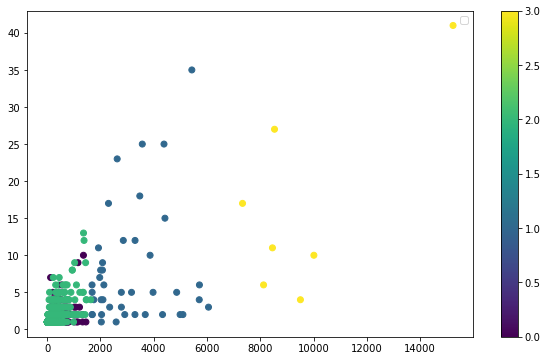

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(dfrfm.monetary,dfrfm.frequency,c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [50]:
allscore=[]
allcluster=[]
sum_of_squared_distance=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(dfrfm)
        pred=model.predict(dfrfm)
        sum_of_squared_distance.append(model.inertia_)
        score=silhouette_score(dfrfm,pred)
        print('Number of cluster {}, silhouette {} '.format(no_of_cluster,score))
        allscore.append(score)
        allcluster.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.93547745522696 
Number of cluster 3, silhouette 0.893572360618967 
Number of cluster 4, silhouette 0.5212941630133293 
Number of cluster 5, silhouette 0.5573046720574559 
Number of cluster 6, silhouette 0.558058429034265 
Number of cluster 7, silhouette 0.5683424579601317 
Number of cluster 8, silhouette 0.5021736890138532 
Number of cluster 9, silhouette 0.5137748816513444 


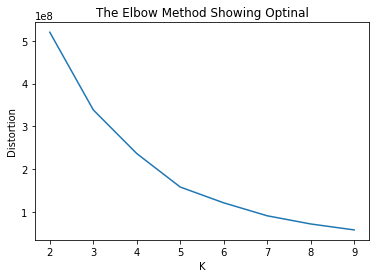

In [51]:
plt.plot(allcluster,sum_of_squared_distance)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing Optinal')
plt.show()


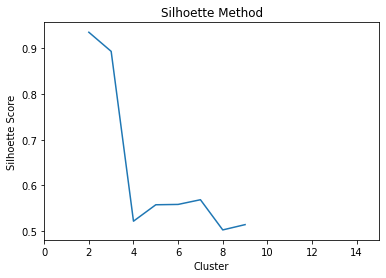

In [52]:
plt.plot(allcluster,allscore)
plt.xlabel('Cluster')
plt.ylabel('Silhoette Score')
plt.title('Silhoette Method')
plt.xlim(0,15)
plt.show()
